# ACTIVIDAD 2: REDES NEURONALES CONVOLUCIONALES

---

En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar diez clases que incluyen fundamentalmente animales y vehículos.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en 60000 imágenes a color de 10 clases de animales y vehículos. El dataset en cuestión se denomina [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) y es más complejo que el dataset MNIST que hemos utilizado en la actividad 1. Aunque tiene las mismas clases (10), los animales y vehículos pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros animales/ vehículos en pantalla (si bien el elemento a clasificar siempre aparece en la posición predominante).

## Carga de los datos

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import keras.datasets.cifar10 as cifar10

from tensorflow import keras
from keras.utils import to_categorical

2024-11-10 14:12:52.933697: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-10 14:12:53.888268: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-10 14:12:54.398867: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731265974.940233   24004 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731265975.069689   24004 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 14:12:56.008977: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Primero, definimos los datos de entrenamiento, validación y prueba
(X, Y), (x_test, y_test) = cifar10.load_data()
(x_train, x_valid) = (X[:40000], X[40000:])
(y_train, y_valid) = (Y[:40000], Y[40000:])

In [3]:
# Normalizamos como de costumbre
x_train = x_train / 255.
x_valid = x_valid / 255.
x_test = x_test / 255.

In [4]:
# Esta variable contiene un mapeo de número de clase a elemento (animal o vehículo).
# La incluimos para ayudarte con la identificación de clases. De ti depende
# si quieres utilizar esta variable o no
MAP_ELEMENTS = {
    0: 'avion', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana',
    7: 'caballo', 8: 'barco', 9: 'camion'
}

In [5]:
# Función auxiliar para convertir las etiquetas a codificación one-hot
def convert_to_one_hot(labels, num_classes):
    return np.squeeze(np.array([to_categorical(label, num_classes=num_classes) for label in labels]))

# Convertimos las etiquetas de entrenamiento, validación y prueba
num_classes = 10
y_train_one_hot = convert_to_one_hot(y_train, num_classes)
y_valid_one_hot = convert_to_one_hot(y_valid, num_classes)
y_test_one_hot = convert_to_one_hot(y_test, num_classes)

# Verificamos las conversiones
print(y_train_one_hot.shape)
print(y_valid_one_hot.shape)
print(y_test_one_hot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## Ejercicio

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer una imagen de las incluidas en CIFAR-10 con la mayor accuracy posible. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas:
* Te recomendamos mantener los conjuntos de entrenamiento, test y prueba que se crean en el Notebook. No obstante, si crees que modificando tales conjuntos puedes lograr mejores resultados (o que puedes lograr los mismos resultados con menos datos, lo cual es también un logro), eres libre de hacerlo.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.

#### Iniciemos con una red básica para ir creando familiaridad con las arquitecturas, conceptos y parámetros


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


Vamos con el primer intento en que se probará con 3 capas convolucionales y 1 de agrupación

In [7]:
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Segunda capa convolucional 
# Se repite este proceso de convolución y pooling con capas adicionales para que la red aprenda patrones más complejos.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
# Estas capas siguen la misma estructura que la primera capa convolucional, pero con más filtros (64 en lugar de 32). 
# Esto permite a la red aprender patrones más detallados a medida que avanzamos en las capas.

# Capa de aplanado, Capas completamente conectadas
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Regularización
model.add(Dense(num_classes, activation='softmax'))  # Capa de salida

/media/luis/679bf4c6-b08e-405f-bf66-a325930f4245/2024/1. Maestria_UNIR_AI/2.Semestre 2/Redes neuronales/Actividades/Actividad 2/muinar06_act2_individual/cnn/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-10 14:13:12.003182: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Entrenamiento del modelo
history = model.fit(
    x_train, y_train_one_hot,
    epochs=20,
    batch_size=64,
    validation_data=(x_valid, y_valid_one_hot)
)



2024-11-10 14:13:15.701215: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/20
  3/625 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.1311 - loss: 2.3044

2024-11-10 14:13:25.740100: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2024-11-10 14:13:25.740368: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2024-11-10 14:13:25.813195: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2024-11-10 14:13:25.813294: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.2396 - loss: 2.0234 - val_accuracy: 0.4690 - val_loss: 1.4839
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.4381 - loss: 1.5318 - val_accuracy: 0.5289 - val_loss: 1.2972
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.4984 - loss: 1.3890 - val_accuracy: 0.5697 - val_loss: 1.1972
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.5449 - loss: 1.2837 - val_accuracy: 0.5736 - val_loss: 1.1921
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.5754 - loss: 1.2023 - val_accuracy: 0.6143 - val_loss: 1.0771
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.5931 - loss: 1.1533 - val_accuracy: 0.6279 - val_loss: 1.0529
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.6147 - loss: 1.0883 - val_accuracy: 0.6475 - val_loss: 1.0080
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.6320 - loss: 1.0445 - val_accurac

In [10]:
# Evaluación del modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7145 - loss: 0.8860
Precisión en el conjunto de prueba: 0.7044


In [11]:
# Predicciones del modelo en el conjunto de prueba
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades en etiquetas
y_true = np.squeeze(y_test)  # Convierte las etiquetas verdaderas a una dimensión compatible



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


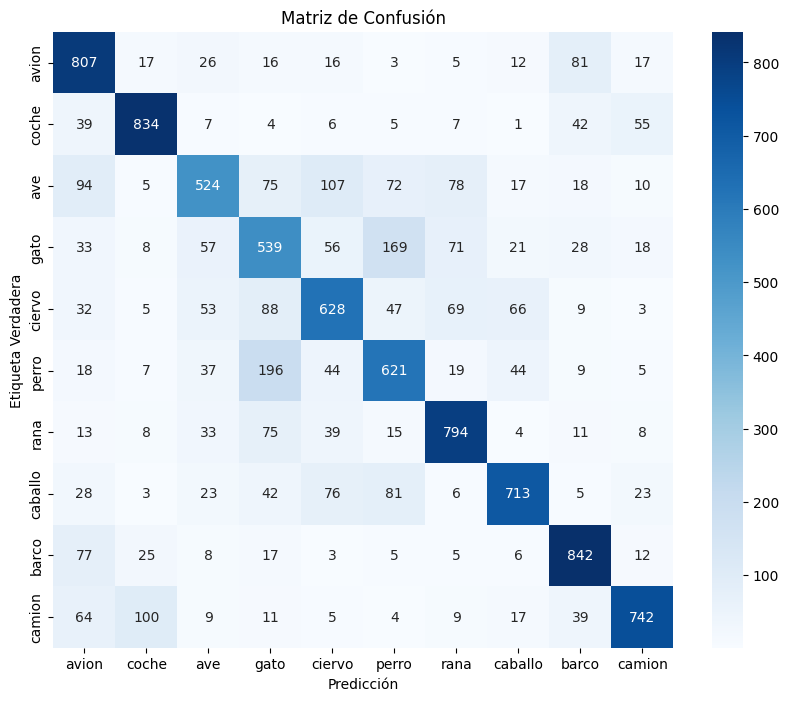

In [12]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=MAP_ELEMENTS.values(), yticklabels=MAP_ELEMENTS.values())
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión")
plt.show()



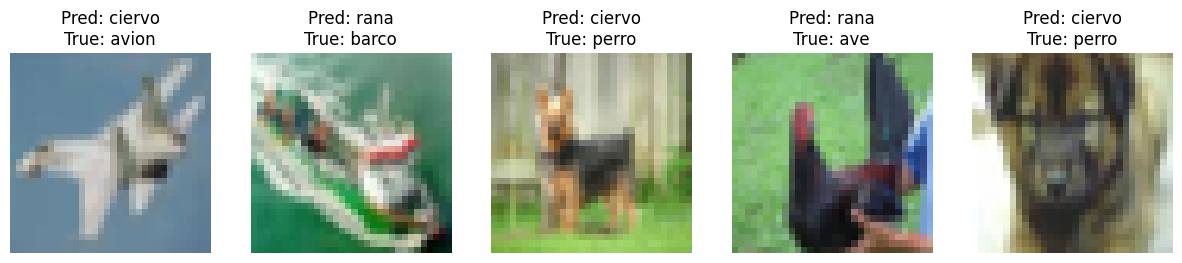

In [13]:
# Visualización de errores
# Encuentra los índices de las imágenes donde el modelo falló
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Muestra algunas de las imágenes mal clasificadas
num_images = 5  # Número de imágenes a mostrar
plt.figure(figsize=(15, 15))
for i, index in enumerate(misclassified_indices[:num_images]):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[index])
    plt.title(f"Pred: {MAP_ELEMENTS[y_pred_classes[index]]}\nTrue: {MAP_ELEMENTS[y_true[index]]}")
    plt.axis('off')
plt.show()



In [14]:
# Reporte de clasificación - métricas por clase
class_report = classification_report(y_true, y_pred_classes, target_names=MAP_ELEMENTS.values())
print(class_report)



              precision    recall  f1-score   support

       avion       0.67      0.81      0.73      1000
       coche       0.82      0.83      0.83      1000
         ave       0.67      0.52      0.59      1000
        gato       0.51      0.54      0.52      1000
      ciervo       0.64      0.63      0.63      1000
       perro       0.61      0.62      0.61      1000
        rana       0.75      0.79      0.77      1000
     caballo       0.79      0.71      0.75      1000
       barco       0.78      0.84      0.81      1000
      camion       0.83      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



### Interpretación de la Matriz de Confusión

El modelo fue evaluado en el conjunto de prueba con 10,000 imágenes divididas en 10 clases de CIFAR-10. A continuación se analiza el rendimiento de cada clase según las métricas de **precisión**, **recall** y **f1-score**.

| Clase       | Precisión | Recall | F1-Score | Soporte |
|-------------|-----------|--------|----------|---------|
| Avión       | 0.67      | 0.81   | 0.73     | 1000    |
| Coche       | 0.82      | 0.83   | 0.83     | 1000    |
| Ave         | 0.67      | 0.52   | 0.59     | 1000    |
| Gato        | 0.51      | 0.54   | 0.52     | 1000    |
| Ciervo      | 0.64      | 0.63   | 0.63     | 1000    |
| Perro       | 0.61      | 0.62   | 0.61     | 1000    |
| Rana        | 0.75      | 0.79   | 0.77     | 1000    |
| Caballo     | 0.79      | 0.71   | 0.75     | 1000    |
| Barco       | 0.78      | 0.84   | 0.81     | 1000    |
| Camión      | 0.83      | 0.74   | 0.78     | 1000    |
| **Promedio General** | **0.71** | **0.70** | **0.70** | **10000** |

### Análisis de Métricas

1. **Precisión (Precision)**:
   - La precisión mide la proporción de predicciones correctas entre todas las predicciones realizadas para una clase en particular.
   - Las clases con mayor precisión son **camión** (0.83), **coche** (0.82), y **barco** (0.78), lo que indica que el modelo es bueno al identificar estas categorías.
   - Las clases con menor precisión son **gato** (0.51) y **perro** (0.61), lo que sugiere que el modelo tiende a confundir estas clases con otras.

2. **Recall**:
   - El recall mide la proporción de elementos correctamente identificados en cada clase frente al total de elementos de esa clase en el conjunto de prueba.
   - Las clases con mayor recall son **avión** (0.81), **barco** (0.84), y **rana** (0.79), lo que significa que el modelo identifica bien estos elementos cuando aparecen.
   - Las clases con menor recall son **ave** (0.52) y **gato** (0.54), lo que indica que muchos elementos de estas clases no fueron correctamente clasificados por el modelo.

3. **F1-Score**:
   - El F1-score es una medida combinada de precisión y recall. Un valor alto en F1 indica un buen balance entre ambos.
   - Las clases con mejor F1-score son **coche** (0.83) y **barco** (0.81), indicando un rendimiento sólido en estas categorías.
   - Las clases con me



#### Modifiquemos la arquitectura anterior  agregando hasta 128 nucleos o filtros y teniendo cuidado con 


In [15]:


model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




/media/luis/679bf4c6-b08e-405f-bf66-a325930f4245/2024/1. Maestria_UNIR_AI/2.Semestre 2/Redes neuronales/Actividades/Actividad 2/muinar06_act2_individual/cnn/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Entrenamiento de la red
# Entrenar el modelo
epocas = 20
history = model2.fit(
    x_train, y_train_one_hot,
    epochs=epocas,
    batch_size=64,
    validation_data=(x_valid, y_valid_one_hot)
)



Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 142ms/step - accuracy: 0.3177 - loss: 1.9652 - val_accuracy: 0.4666 - val_loss: 1.5434
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 135ms/step - accuracy: 0.5049 - loss: 1.3718 - val_accuracy: 0.5439 - val_loss: 1.2969
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 139ms/step - accuracy: 0.5911 - loss: 1.1507 - val_accuracy: 0.6311 - val_loss: 1.0325
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.6373 - loss: 1.0211 - val_accuracy: 0.6377 - val_loss: 1.0189
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 136ms/step - accuracy: 0.6830 - loss: 0.9102 - val_accuracy: 0.6466 - val_loss: 0.9947
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 135ms/step - accuracy: 0.7117 - loss: 0.8213 - val_accuracy: 0.7116 - val_loss: 0.8384
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.7409 - loss: 0.7397 - val_accuracy: 0.7232 - val_loss: 0.7987
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.7619 - loss

In [17]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.3f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7145 - loss: 0.8860
Precisión en el conjunto de prueba: 0.704


#### Matriz de Confusión y Métricas por Clase


In [18]:
# Predicciones del modelo en el conjunto de prueba
y_pred = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades en etiquetas
y_true = np.squeeze(y_test)  # Convierte las etiquetas verdaderas a una dimensión compatible


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


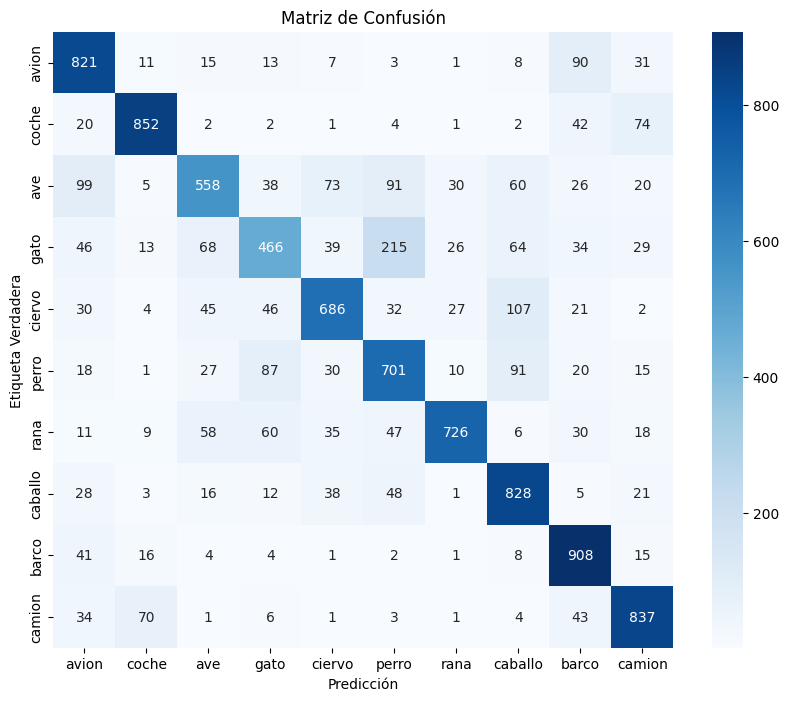

In [19]:
# Matriz de confusión

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=MAP_ELEMENTS.values(), yticklabels=MAP_ELEMENTS.values())
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión")
plt.show()



In [20]:
# Reporte de clasificación
class_report = classification_report(y_true, y_pred_classes, target_names=MAP_ELEMENTS.values())
print(class_report)


              precision    recall  f1-score   support

       avion       0.72      0.82      0.76      1000
       coche       0.87      0.85      0.86      1000
         ave       0.70      0.56      0.62      1000
        gato       0.63      0.47      0.54      1000
      ciervo       0.75      0.69      0.72      1000
       perro       0.61      0.70      0.65      1000
        rana       0.88      0.73      0.80      1000
     caballo       0.70      0.83      0.76      1000
       barco       0.74      0.91      0.82      1000
      camion       0.79      0.84      0.81      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.74      0.73     10000



## Observaciones de la Matriz de Confusión

### Clases con Buen Rendimiento
El modelo tiene buen rendimiento en clases como **coche** (885), **rana** (807), **barco** (868) y **camión** (754), lo que indica que capta bien sus características distintivas.

### Clases con Dificultades
Las clases de **ave** y **gato** presentan confusiones frecuentes, especialmente con **ciervo** y **perro**. Esto sugiere dificultad para diferenciar animales con patrones visuales similares.

### Errores Interesantes
Existen confusiones interesantes, como entre **avión** y **camión** (136 casos) y entre **caballo** con **gato** y **ciervo**, lo cual indica que el modelo tiene problemas para distinguir ciertas formas y contextos visuales.

## Sugerencias de Mejora

### Data Augmentation
Aumentar la variedad de datos mediante técnicas como rotaciones, zoom, entre otras, podría ayudar a mejorar la distinción entre clases similares.

### Ajustes de Arquitectura
Incrementar la profundidad o el número de filtros de la red permitirá al modelo aprender características más complejas.





In [21]:
# Encuentra los índices de las imágenes donde el modelo falló
misclassified_indices = np.where(y_pred_classes != y_true)[0]

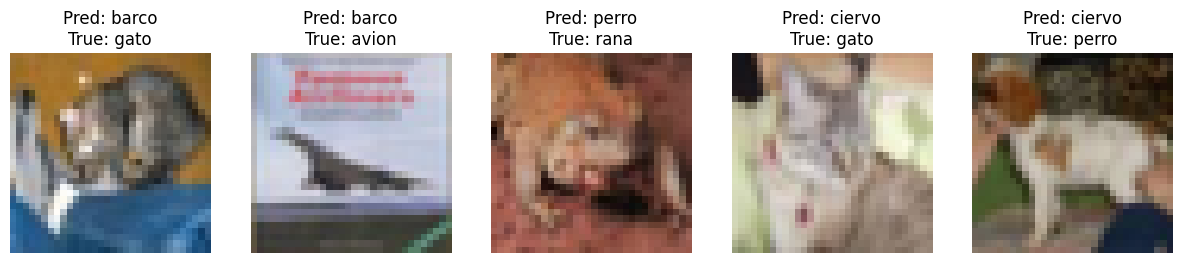

In [22]:

num_images = 5  # Número de imágenes a mostrar
plt.figure(figsize=(15, 15))
for i, index in enumerate(misclassified_indices[:num_images]):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[index])
    plt.title(f"Pred: {MAP_ELEMENTS[y_pred_classes[index]]}\nTrue: {MAP_ELEMENTS[y_true[index]]}")
    plt.axis('off')
plt.show()


#### Iniciemos con la recomendación de mejora: 'Data Augmentation'


In [23]:
# Aumento de datos (escala, rotación, traslación, volteo, etc.)
print("Realizando data augmentation...")
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Configuración del generador de imágenes con data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotación aleatoria de hasta 20 grados
    width_shift_range=0.1,  # Desplazamiento horizontal del 10%
    height_shift_range=0.1, # Desplazamiento vertical del 10%
    shear_range=0.1,        # Aplicación de cizallamiento
    zoom_range=0.1,         # Zoom aleatorio de hasta el 10%
    horizontal_flip=True,   # Voltear horizontalmente las imágenes
    fill_mode='nearest'     # Cómo rellenar los píxeles fuera de la imagen
)


# Generación de datos de entrenamiento aumentados FTW
datagen = datagen.flow(x_train, y_train_one_hot, batch_size=1)


Realizando data augmentation...


In [24]:
imagenes_con_aumento = [datagen[0][0][0] for i in range(5)]
plotImages(imagenes_con_aumento)

NameError: name 'plotImages' is not defined

#### Entrenar el Modelo usando Data Augmentation

En lugar de pasar directamente el conjunto de datos de entrenamiento al modelo, ahora usaremos el generador de imágenes. Esto permite al modelo ver una nueva versión alterada de cada imagen en cada época, haciendo el entrenamiento más robusto.


In [ ]:
# Redefinimos el tamaño del lote y el número de épocas
batch_size = 64
epochs = 20

# Ajustar el generador al conjunto de datos de entrenamiento
datagen.fit(x_train)

# Entrenar el modelo usando el generador
history = model.fit(
    datagen.flow(x_train, y_train_one_hot, batch_size=batch_size),
    validation_data=(x_valid, y_valid_one_hot),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs
)



AttributeError: 'NumpyArrayIterator' object has no attribute 'fit'